<a href="https://colab.research.google.com/github/Lakshij212/CODSOFT-PROJECTS/blob/main/CREDIT_CARD_FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from xgboost import XGBClassifier


In [48]:
dataset=pd.read_csv("/content/creditcard.csv")
print(f"no. of rows in the dataset ==>> {dataset.shape[0]}")
print(f"no. of columns in the dataset ==>> {dataset.shape[1]}")

no. of rows in the dataset ==>> 144667
no. of columns in the dataset ==>> 31


In [49]:
dataset.head(n=3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0


In [50]:
print("the name of the columns in the given dataset are:")
dataset.columns

the name of the columns in the given dataset are:


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [51]:
dataset.drop(["Time"],axis=1,inplace=True)

In [52]:
dataset.dtypes

V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object

In [53]:
dataset.isna().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [54]:
dataset_fraud=dataset[dataset.Class==1]
dataset_true=dataset[dataset.Class==0]
dataset_true=dataset.sample(frac=0.5)
data=pd.concat([dataset_true,dataset_fraud])
data=data.reset_index(drop=True)
data.shape


(72614, 30)

In [ ]:
data['Amount'].describe()

count    1988.000000
mean       67.151142
std       204.683551
min         0.000000
25%         1.980000
50%        12.990000
75%        54.630000
max      3828.040000
Name: Amount, dtype: float64

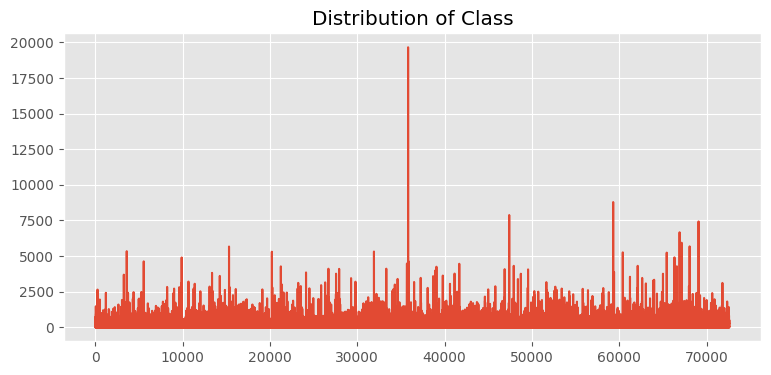

In [55]:
with plt.style.context(('ggplot')):
  plt.figure(figsize=(9,4))
  plt.title("Distribution of Class")
  plt.plot(data["Amount"])
  plt.show()

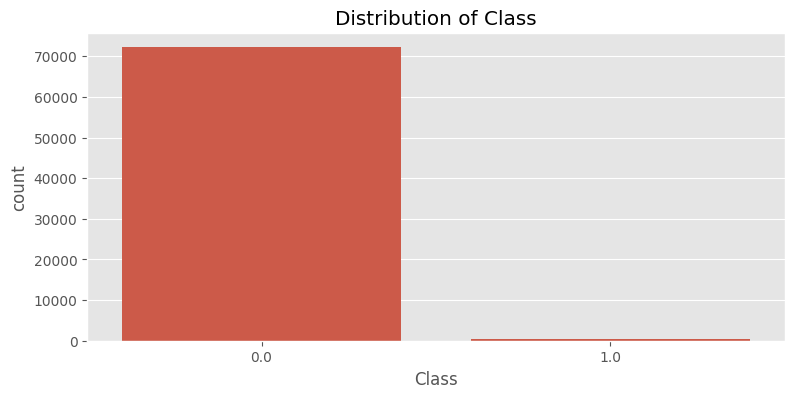

In [56]:
with plt.style.context(('ggplot')):
  plt.figure(figsize=(9,4))
  plt.title("Distribution of Class")
  sns.countplot(data=data,x=data["Class"])
  plt.show()

In [57]:
fraud_per=round((len(dataset[dataset.Class==1])/len(dataset[dataset.Class==0]))*100,2)
print(f"The percentge of fraud detection is {fraud_per} % ")

The percentge of fraud detection is 0.19 % 


In [58]:
sc=StandardScaler()
data.Amount=sc.fit_transform(data.Amount.values.reshape(-1,1))

In [59]:
data.Amount

0        0.557031
1       -0.310408
2       -0.360041
3       -0.364071
4       -0.244862
           ...   
72609    0.671840
72610   -0.364071
72611    0.621878
72612   -0.364071
72613    0.908283
Name: Amount, Length: 72614, dtype: float64

In [60]:
data.drop_duplicates(inplace=True)

In [61]:
data.shape

(70930, 30)

In [66]:
x=data.drop(["Class"],axis=1)
y=data["Class"]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.55)

In [67]:
model_log=LogisticRegression()
model_log.fit(x_train,y_train)
y_pred_log=model_log.predict(x_test)
print(f"The accuracy of the model is {round(model_log.score(x_test,y_test)*100,2)}%")

The accuracy of the model is 99.89%


In [68]:
print(f"F1-Score of the model is{round(f1_score(y_test,y_pred_log),2)} ")

F1-Score of the model is0.83 


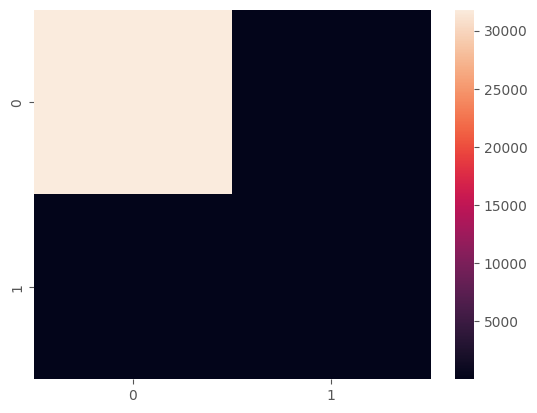

In [76]:
with plt.style.context(('ggplot')):
  sns.heatmap(confusion_matrix(y_test,y_pred_log))

In [73]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred_random=model.predict(x_test)

In [74]:
print(f"The accuracy of the model is {round(model.score(x_test,y_test)*100,2)}%")

The accuracy of the model is 99.91%


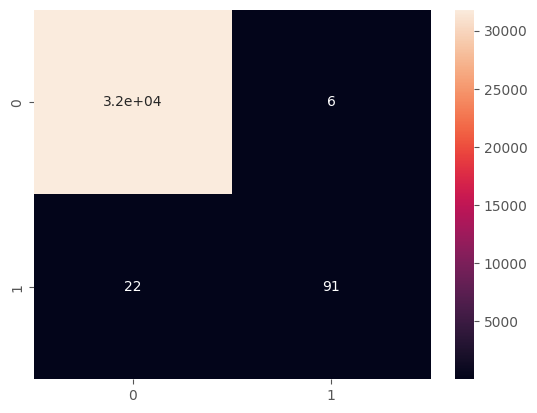

In [75]:
with plt.style.context(('ggplot')):
  sns.heatmap(confusion_matrix(y_test,y_pred_random),annot=True)

In [77]:
print(f"F1-Score of the model is{round(f1_score(y_test,y_pred_random),2)} ")

F1-Score of the model is0.87 


In [78]:
model_xgb=XGBClassifier(max_depth=2)
model_xgb.fit(x_train,y_train)
y_pred_xgb=model_xgb.predict(x_test)

In [79]:
print(f"The accuracy of the model is {round(model_xgb.score(x_test,y_test)*100,2)}%")

The accuracy of the model is 99.92%


In [80]:
print(f"F1-Score of the model is{round(f1_score(y_test,y_pred_xgb),2)} ")

F1-Score of the model is0.88 


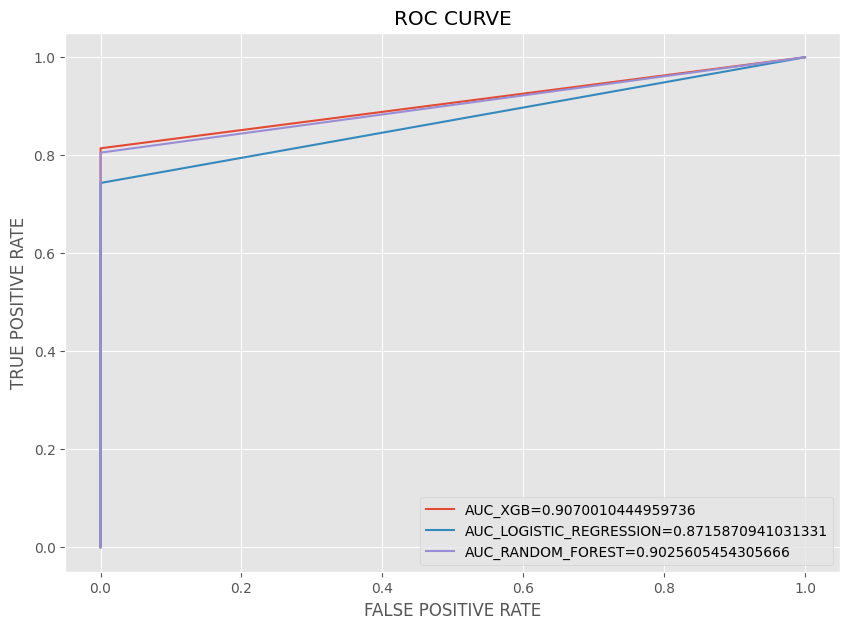

In [81]:
fpr_xgb,tpr_xgb,_=metrics.roc_curve(y_test,y_pred_xgb)
auc_xgb=metrics.roc_auc_score(y_test,y_pred_xgb)
fpr_log,tpr_log,_=metrics.roc_curve(y_test,y_pred_log)
auc_log=metrics.roc_auc_score(y_test,y_pred_log)
fpr_rand,tpr_rand,_=metrics.roc_curve(y_test,y_pred_random)
auc_rand=metrics.roc_auc_score(y_test,y_pred_random)


with plt.style.context(('ggplot')):
  plt.figure(figsize=(10,7))
  plt.title("ROC CURVE")
  plt.plot(fpr_xgb,tpr_xgb,label="AUC_XGB="+str(auc_xgb))
  plt.plot(fpr_log,tpr_log,label="AUC_LOGISTIC_REGRESSION="+str(auc_log))
  plt.plot(fpr_rand,tpr_rand,label="AUC_RANDOM_FOREST="+str(auc_rand))
  plt.ylabel('TRUE POSITIVE RATE')
  plt.xlabel('FALSE POSITIVE RATE')
  plt.legend(loc=4)
  plt.show()